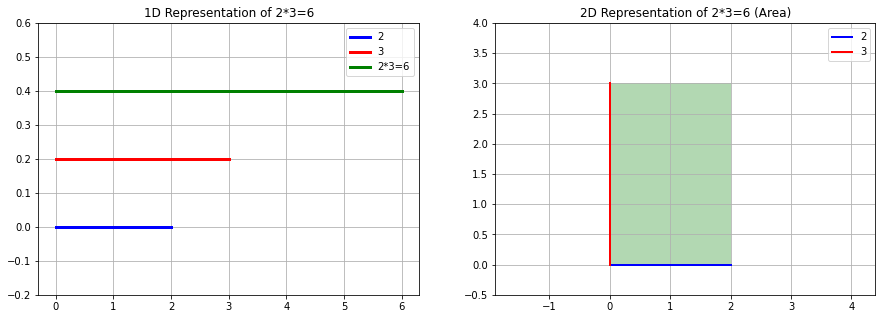

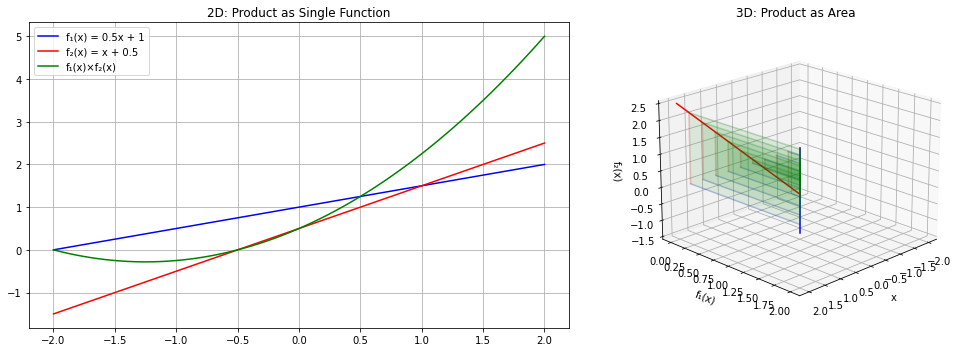

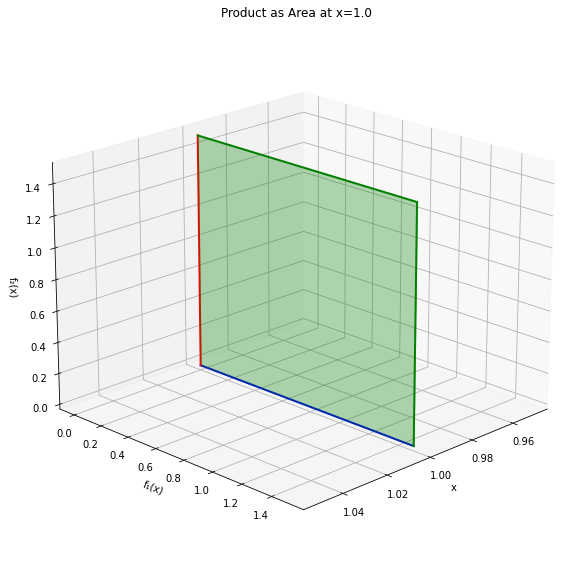

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 1. 먼저 숫자의 곱을 1차원과 2차원에서 비교
plt.figure(figsize=(15, 5))

# 1차원에서 2*3=6
plt.subplot(121)
plt.plot([0, 2], [0, 0], 'b-', linewidth=3, label='2')
plt.plot([0, 3], [0.2, 0.2], 'r-', linewidth=3, label='3')
plt.plot([0, 6], [0.4, 0.4], 'g-', linewidth=3, label='2*3=6')
plt.grid(True)
plt.legend()
plt.title('1D Representation of 2*3=6')
plt.ylim(-0.2, 0.6)

# 2차원에서 2*3=6 (면적)
plt.subplot(122)
rect = plt.Rectangle((0, 0), 2, 3, facecolor='green', alpha=0.3)
plt.gca().add_patch(rect)
plt.plot([0, 2], [0, 0], 'b-', linewidth=2, label='2')
plt.plot([0, 0], [0, 3], 'r-', linewidth=2, label='3')
plt.grid(True)
plt.legend()
plt.title('2D Representation of 2*3=6 (Area)')
plt.axis('equal')
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 4)

plt.show()

# 2. 함수의 곱을 3D로 시각화
x = np.linspace(-2, 2, 100)
def f1(x): return 0.5*x + 1  # y = 0.5x + 1
def f2(x): return x + 0.5    # y = x + 0.5

# 2D에서의 표현
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.plot(x, f1(x), 'b-', label='f₁(x) = 0.5x + 1')
plt.plot(x, f2(x), 'r-', label='f₂(x) = x + 0.5')
plt.plot(x, f1(x)*f2(x), 'g-', label='f₁(x)×f₂(x)')
plt.grid(True)
plt.legend()
plt.title('2D: Product as Single Function')

# 3D에서의 표현
ax = plt.subplot(122, projection='3d')

# 함수들 그리기
ax.plot(x, f1(x), np.zeros_like(x), 'b-', label='f₁(x)')
ax.plot(x, np.zeros_like(x), f2(x), 'r-', label='f₂(x)')

# 각 x에서 직사각형 그리기
for i in range(0, len(x), 10):  # 10개 간격으로 그리기
    xi = x[i]
    y1 = f1(xi)
    y2 = f2(xi)
    
    # 직사각형의 각 모서리
    vertices = [
        [xi, 0, 0],
        [xi, y1, 0],
        [xi, y1, y2],
        [xi, 0, y2]
    ]
    
    # 직사각형 면 그리기
    poly = Poly3DCollection([vertices], alpha=0.1)
    poly.set_color('green')
    ax.add_collection3d(poly)
    
    # 직사각형 테두리 그리기
    ax.plot([xi, xi], [0, y1], [0, 0], 'b-', alpha=0.2)
    ax.plot([xi, xi], [0, 0], [0, y2], 'r-', alpha=0.2)
    ax.plot([xi, xi], [y1, y1], [0, y2], 'g-', alpha=0.2)
    ax.plot([xi, xi], [0, y1], [y2, y2], 'g-', alpha=0.2)

ax.set_xlabel('x')
ax.set_ylabel('f₁(x)')
ax.set_zlabel('f₂(x)')
ax.view_init(elev=20, azim=45)
plt.title('3D: Product as Area')

plt.tight_layout()
plt.show()

# 3. 특정 지점에서의 곱을 자세히 보기
plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

x_point = 1.0
y1 = f1(x_point)
y2 = f2(x_point)

# 직사각형 테두리 그리기
ax.plot([x_point, x_point], [0, y1], [0, 0], 'b-', linewidth=2)
ax.plot([x_point, x_point], [0, 0], [0, y2], 'r-', linewidth=2)
ax.plot([x_point, x_point], [y1, y1], [0, y2], 'g-', linewidth=2)
ax.plot([x_point, x_point], [0, y1], [y2, y2], 'g-', linewidth=2)

# 직사각형 면 그리기
vertices = np.array([[x_point, 0, 0],
                    [x_point, y1, 0],
                    [x_point, y1, y2],
                    [x_point, 0, y2]])
poly = Poly3DCollection([vertices], alpha=0.3)
poly.set_color('green')
ax.add_collection3d(poly)

ax.set_xlabel('x')
ax.set_ylabel('f₁(x)')
ax.set_zlabel('f₂(x)')
ax.view_init(elev=20, azim=45)
plt.title(f'Product as Area at x={x_point}')

plt.show()